## Présentation du jeu de données *Prostate*

Le jeu de données **`prostate.txt`** regroupe des informations cliniques concernant des patients atteints d’un cancer de la prostate.
La prostate est une glande du système reproducteur masculin. Le cancer de la prostate se développe lorsque certaines cellules mutent et se multiplient de manière incontrôlée, pouvant ensuite se propager à d’autres parties du corps (métastases). Comme pour la majorité des cancers, un diagnostic précoce améliore fortement les chances de guérison.

---

## Contexte médical

Le **PSA (Prostate-Specific Antigen)** est une protéine normalement sécrétée par les cellules de la prostate.
Les cellules cancéreuses produisent environ **dix fois plus de PSA** que les cellules normales, ce qui en fait un marqueur potentiel pour le dépistage du cancer de la prostate.

Cependant, le niveau de PSA peut également être influencé par d’autres facteurs non cancéreux, tels que :

* le volume de la prostate,
* la présence d’infections ou d’inflammations,
* certains traitements médicaux.

Il est donc nécessaire de mieux comprendre les facteurs influençant le taux de PSA afin d’en améliorer l’interprétation clinique.

---

## Objectif de l’étude

L’objectif de cette étude est de **mieux comprendre les facteurs influençant le niveau de PSA** chez des patients atteints d’un cancer de la prostate.

Les données proviennent de patients ayant subi une **prostatectomie radicale**, c’est-à-dire l’ablation chirurgicale complète de la prostate.
Avant l’intervention, le taux de PSA a été mesuré par un test sanguin, et les tissus retirés ont été analysés afin de caractériser plus précisément le cancer.

---

## Description des variables

Le jeu de données contient les variables suivantes :

* **`vol`** : volume du cancer.
* **`wht`** : poids de la prostate.
* **`age`** : âge du patient.
* **`bh`** : quantité d’hyperplasie bénigne (tumeur bénigne de la prostate).
* **`pc`** : pénétration capsulaire. Plus la valeur est élevée, plus le cancer a franchi la capsule entourant la prostate pour atteindre les structures voisines.
* **`psa`** : niveau de l’antigène spécifique de la prostate (Prostate-Specific Antigen).

---

## Perspective d’analyse

Dans ce projet, l’analyse vise à explorer les relations entre le PSA et les différentes caractéristiques cliniques des patients.
Une transformation logarithmique de certaines variables est utilisée afin d’améliorer la lisibilité des relations et de faciliter la modélisation statistique, notamment dans le cadre de modèles de régression.




## Analyse prélimiaire - exploration des données

### Import du dataset

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy
import os

from dotenv import load_dotenv
from pathlib import Path



# Charger les variables d'environnement depuis le fichier .env parent
load_dotenv(dotenv_path='../.env')

DATA_PATH = os.getenv("DATA_PATH")
FIGURES_PATH = Path(os.getenv("FIGURES_PATH"))

prostate = pd.read_csv(
    DATA_PATH,  
    sep=r"\s+",
    )


def save_fig(name):
    plt.savefig(FIGURES_PATH / name, dpi=600, bbox_inches="tight")

### Statistiques descriptives

#### Description du dataset
 
- Nombre d'observations

- Nombre de variables

- Valeurs manquantes ?

In [2]:

print('Nombre d\'observations :', prostate.shape[0]) #compte le nombre de lignes = nb d'observations
print('Nombre de variables :', prostate.shape[1]) #compte le nombre de colonnes = nb de variables

print("Nombre de valeurs manquantes :", prostate.isnull().sum())
print(prostate.isnull().values.any())

Nombre d'observations : 80
Nombre de variables : 6
Nombre de valeurs manquantes : vol    0
wht    0
age    0
bh     0
pc     0
psa    0
dtype: int64
False


On trouve donc :
- **80** observations
- 6 colonnes donc **6** variables :
    - vol
    - wht
    - age
    - bh
    - pc
    - psa
- **0** valeurs manquantes par variable

--- 

#### Calcul des stats descriptives pour chaque variable

- moyenne
- médiane
- écart-type
- minimum
- maximum
- quartiles

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

#stats descriptives
prostate.describe()


,vol,wht,age,bh,pc,psa
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,6.771500,41.581250,63.612500,2.691750,2.188750,25.472500
std,8.000974,18.351998,7.897274,2.989996,3.677695,44.306436
min,0.300000,10.750000,41.000000,0.250000,0.250000,0.650000
25%,1.650000,29.200000,60.000000,0.250000,0.250000,6.125000
50%,3.565000,38.300000,65.000000,1.300000,0.450000,14.400000
75%,8.060000,48.475000,68.000000,5.075000,1.875000,21.350000
max,45.650000,111.950000,79.000000,10.240000,18.250000,265.850000


#### Histogrammes

- Visualisation de la distribution
    - normalité
    - symétrie ?
    - concentration des valeurs

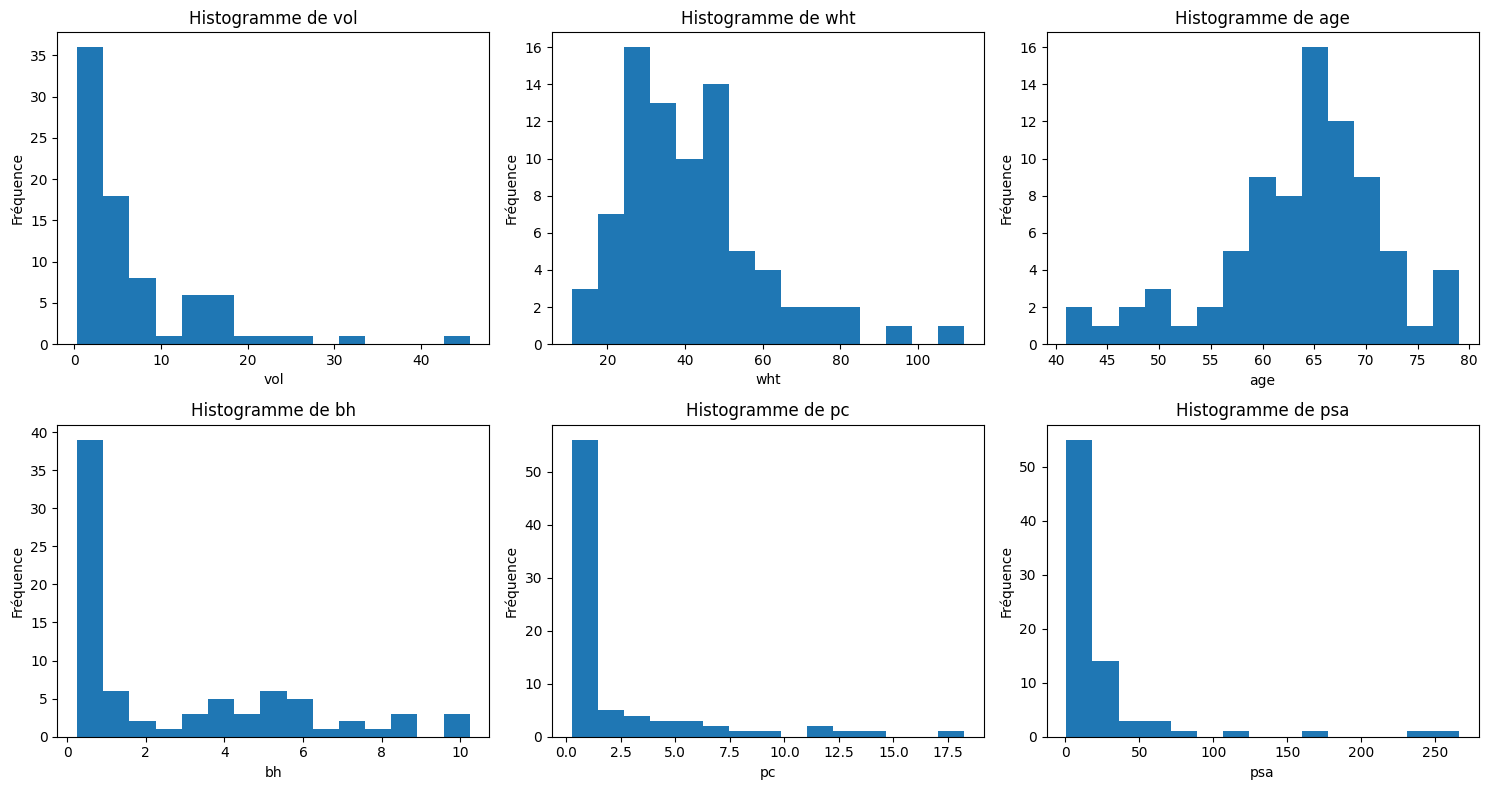

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

variables = ["vol", "wht", "age", "bh", "pc", "psa"]

for ax, var in zip(axes.flatten(), variables):
    ax.hist(prostate[var], bins=15)
    ax.set_title(f"Histogramme de {var}")
    ax.set_xlabel(var)
    ax.set_ylabel("Fréquence")

plt.tight_layout()

filename = "hist_stats_descriptive.png"
save_fig(filename)
# plt.savefig(FIGURES_PATH / filename, dpi=600, bbox_inches="tight")
#plt.savefig('C:\\Users\\peraz\\Documents\\ISEP\\A1\\S1\\IF.1105-Data\\DataScience\\Projet\\figures\\hist_stats_descriptive.png')
plt.show()



### Boxplots

Visualisation de statistiques importantes
- médiane
- quartiles
- min / max


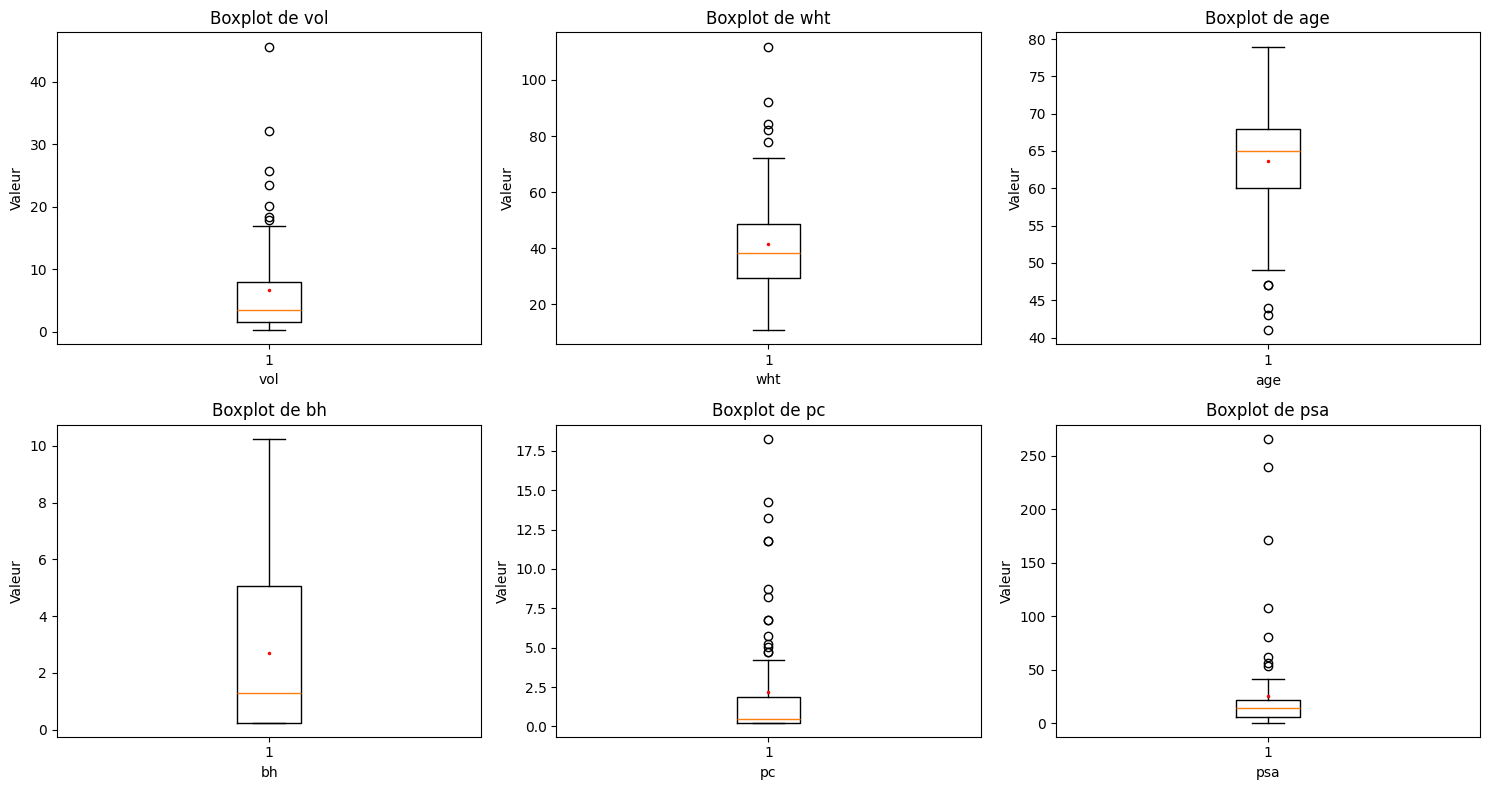

In [5]:
#boxplots

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for ax, var in zip(axes.flatten(), variables):
    ax.boxplot(
        prostate[var], 
        showmeans = True,
        meanprops={"marker": ".",
                       "markeredgecolor": "red",
                       "markersize": "3"}
            )
    ax.set_title(f"Boxplot de {var}")
    ax.set_xlabel(var)
    ax.set_ylabel("Valeur")

plt.tight_layout()
filename = "boxplots_stats_descriptive.png"
save_fig(filename)
# plt.savefig(FIGURES_PATH / filename, dpi=600, bbox_inches="tight")
#plt.savefig('C:\\Users\\peraz\\Documents\\ISEP\\A1\\S1\\IF.1105-Data\\DataScience\\Projet\\figures\\boxplots_stats_descriptive.png')
plt.show()

#### Histogramme + KDE

- Meilleure lecture de la distribution
    - estimation d'une fonction densité

- Meilleure lecture de la forme réelle

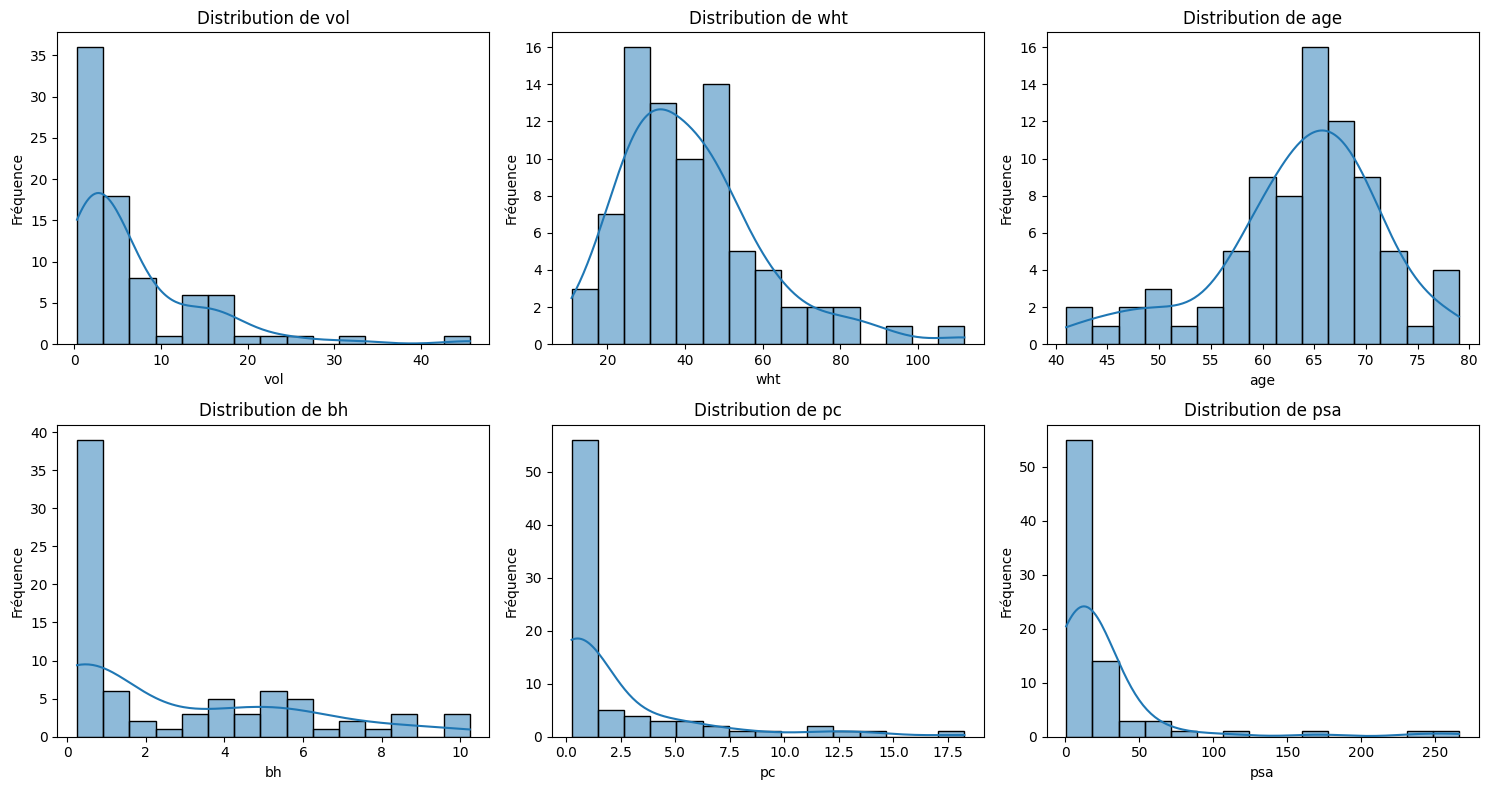

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))


for ax, var in zip(axes.flatten(), variables):
    sns.histplot(prostate[var], bins=15, kde=True, ax=ax)
    ax.set_title(f"Distribution de {var}")
    ax.set_xlabel(var)
    ax.set_ylabel("Fréquence")

plt.tight_layout()
filename = "hist_kde_stats_descriptive.png"
save_fig(filename)
# plt.savefig(FIGURES_PATH / filename, dpi=600, bbox_inches="tight")
#plt.savefig('C:\\Users\\peraz\\Documents\\ISEP\\A1\\S1\\IF.1105-Data\\DataScience\\Projet\\figures\\hist_kde_stats_descriptive.png')
plt.show()

#### Scatter - transformation des variables en variables logarithmique

- Meilleure lecture des graphes
- Meilleure interprétation des résultats

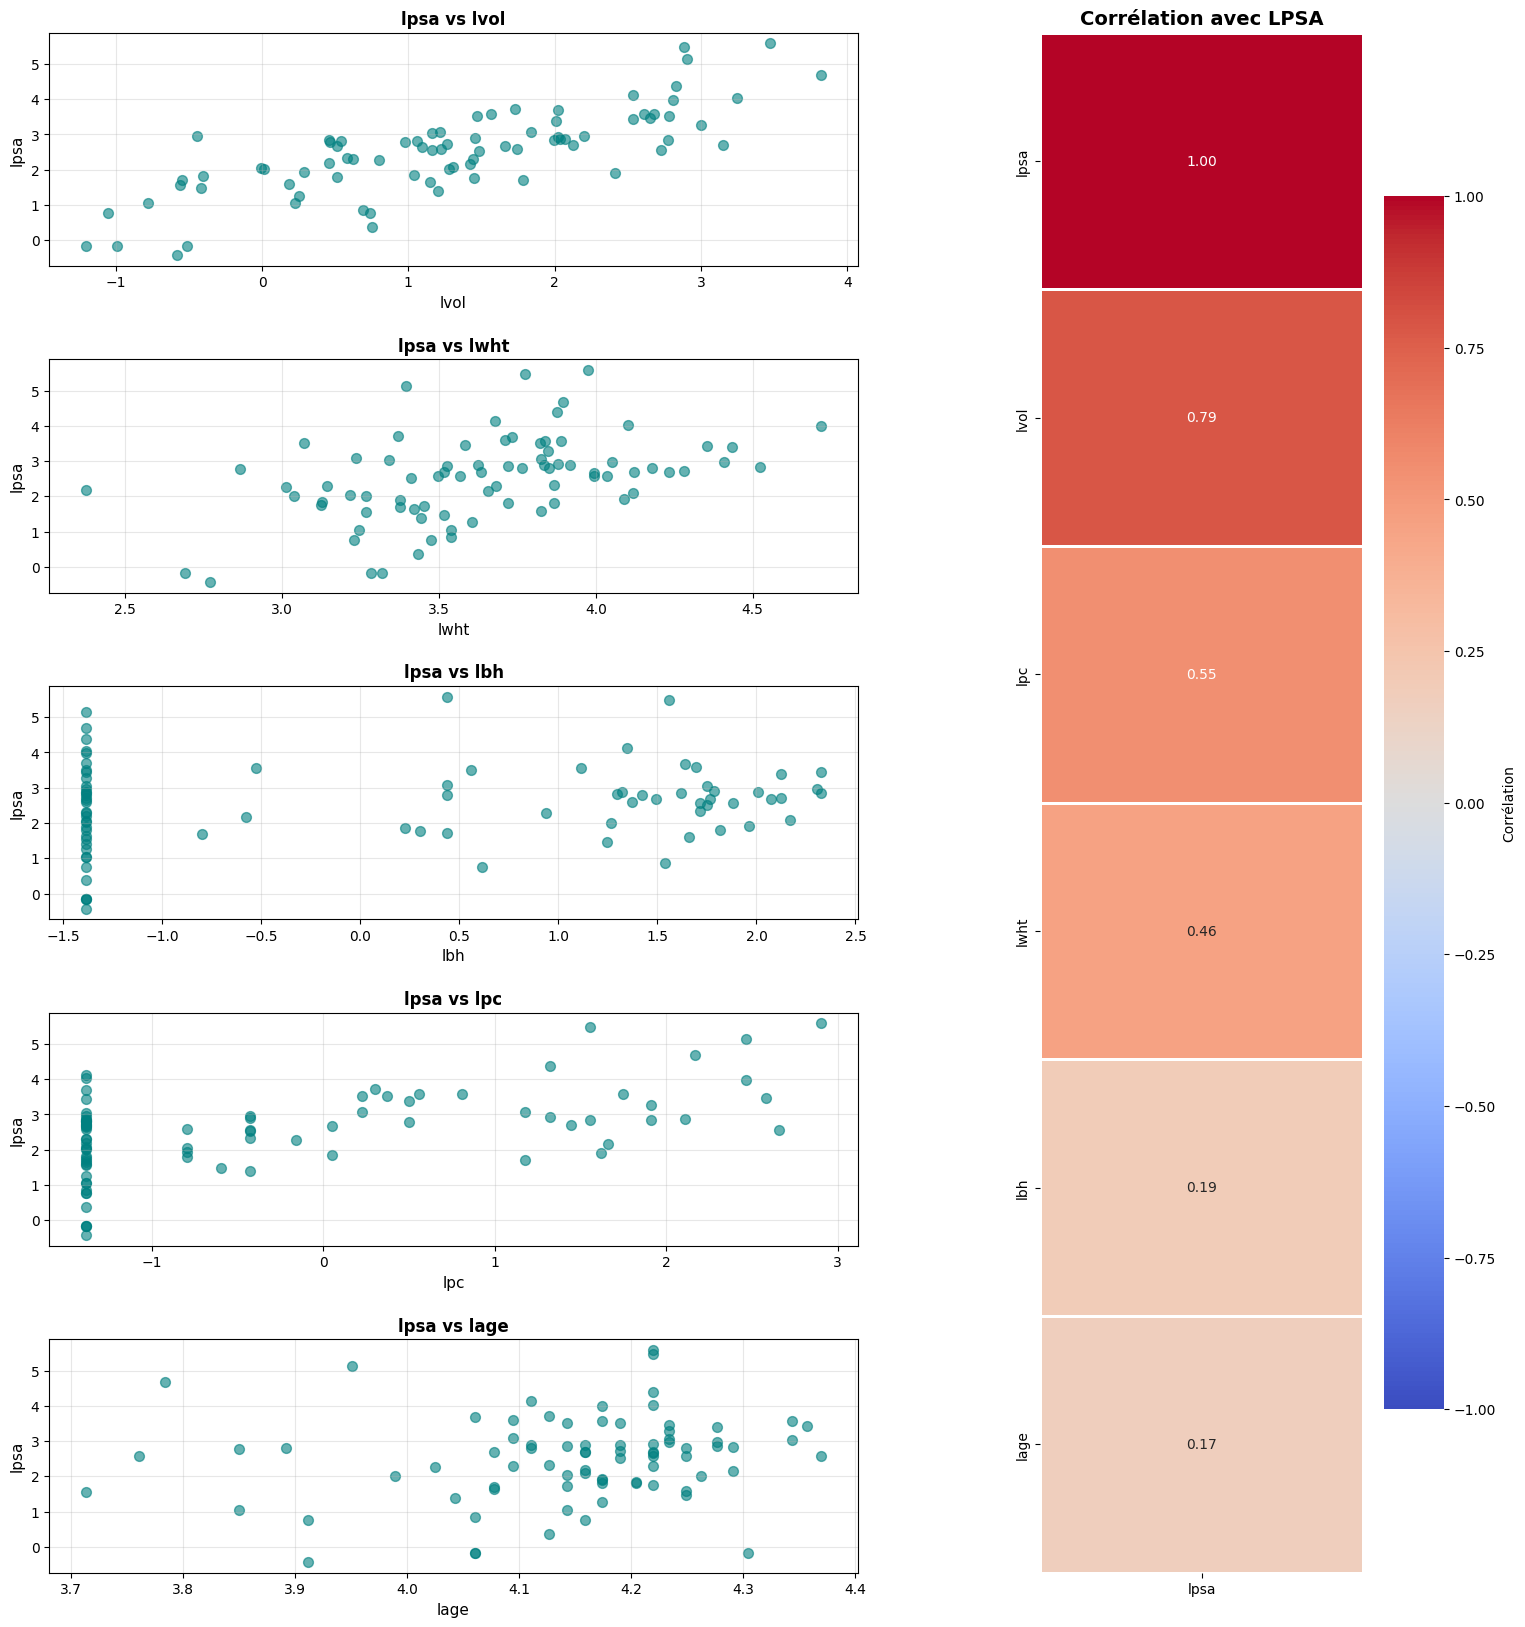

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Variables log
prostate["lvol"] = np.log(prostate["vol"])
prostate["lwht"] = np.log(prostate["wht"])
prostate["lbh"] = np.log(prostate["bh"])
prostate["lpc"] = np.log(prostate["pc"])
prostate["lpsa"] = np.log(prostate["psa"])
prostate["lage"] = np.log(prostate["age"])

pairs = [("lvol", "lpsa"), ("lwht", "lpsa"),
         ("lbh", "lpsa"), ("lpc", "lpsa"), ("lage", "lpsa")]
log_vars = ['lvol', 'lwht', 'lbh', 'lpc', 'lage', 'lpsa']

# Figure avec GridSpec : 2 colonnes (gauche large, droite étroite)
fig = plt.figure(figsize=(18, 20))
gs = GridSpec(5, 2, width_ratios=[2, 1], hspace=0.4, wspace=0.3)

# GAUCHE : Scatter plots (5 lignes, 1 colonne)
for i, (x, y) in enumerate(pairs):
    ax = fig.add_subplot(gs[i, 0])
    ax.scatter(prostate[x], prostate[y], color='teal', alpha=0.6, s=50)
    ax.set_xlabel(x, fontsize=11)
    ax.set_ylabel(y, fontsize=11)
    ax.set_title(f"{y} vs {x}", fontsize=12, fontweight='bold')
    ax.grid(alpha=0.3)


# DROITE : Heatmap (occupe toute la hauteur)
ax_heatmap = fig.add_subplot(gs[:, 1])

# calculer la corrélation avec les valeurs logarithmiques et ne garder que lpsa pour comparer avec les autres
corr_lpsa = prostate[log_vars].corr()[['lpsa']].sort_values(
    by='lpsa',
    ascending=False
)

sns.heatmap(
    corr_lpsa,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=1,
    cbar_kws={"label": "Corrélation"},
    ax=ax_heatmap,
    vmin=-1,
    vmax=1
)
ax_heatmap.set_title("Corrélation avec LPSA", fontsize=14, fontweight='bold')
filename = "scatter_stats_descriptive.png"
save_fig(filename)
# plt.savefig(FIGURES_PATH / filename, dpi=600, bbox_inches="tight")
#plt.savefig('C:\\Users\\peraz\\Documents\\ISEP\\A1\\S1\\IF.1105-Data\\DataScience\\Projet\\figures\\scatter_stats_descriptive.png')
plt.show()

### Interprétation des résultats

#### **lpsa vs lvol**

C’est la relation la plus visible du graphique.

* relation quasiment linéaire
* faible dispersion des points

→ Plus le volume prostatique augmente, plus le PSA tend à augmenter.

---

#### **lpsa vs lwht**

Relation positive observable.

* dispersion plus importante que pour *lpsa vs lvol*
* tendance globale néanmoins identifiable

→ Le poids prostatique semble lié au PSA, mais la relation est moins marquée.

---

#### **lpsa vs lbh**

Relation positive faible à modérée.

* présence de regroupements verticaux (valeurs discrètes à l’origine)
* forte dispersion
* absence de linéarité claire

→ La variable *lbh* n'est pas très explicative lorsqu’elle est considérée seule.

---

#### **lpsa vs lpc**

Relation positive relativement nette.

* tendance croissante visible
* dispersion modérée
* présence de quelques valeurs extrêmes

→ *lpc* semble être une variable explicative pertinente

---

#### **lpsa vs lage**

Relation très faible.

* nuage de points fortement dispersé
* aucune tendance linéaire claire observable

→ L’âge semble avoir une influence limitée sur le PSA

---

### Conclusion générale

La transformation logarithmique des variables permet de réduire la concentration des points et de rendre les relations plus lisibles.
Les variables *lvol* et *lpc* montrent les relations les plus marquées avec *lpsa*, suggérant qu’elles constituent de bons candidats pour un modèle explicatif.
À l’inverse, *lbh* et *lage* semblent moins informatives et explicatives si elles sont prises isolément.

---







On peut même faire une carte de chaleur pour valider ce qu'on dit 
- on remarque bien que `lvol` a la corrélation la + importante avec `lpsa`